<a href="https://colab.research.google.com/github/kim1987/aiffel/blob/main/explore_three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATION_03

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp -r /content/drive/MyDrive/colabdata/aiffel/ex_three/camera_sticker /content/

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

이미지 불러오기

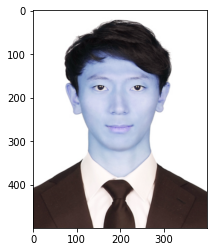

In [7]:
my_image_path = "./camera_sticker/images/image.jpg"
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr,(400,500))
img_show = img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

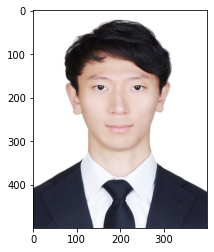

In [8]:
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

얼굴 위치 확인

In [9]:
import dlib

detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

In [10]:
print(dlib_rects)

rectangles[[(97, 139) (283, 325)]]


<function matplotlib.pyplot.show>

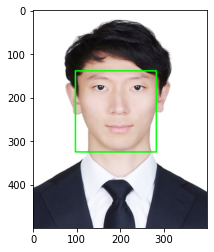

In [11]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show

얼굴 포인트 체크

In [12]:
import os
model_path="./camera_sticker/models/shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


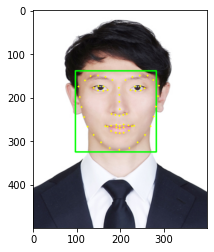

In [14]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

왕관 씌우기

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.height()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(199, 227)
(x,y) : (199,134)
(w,h) : (187,187)


(187, 187, 3)


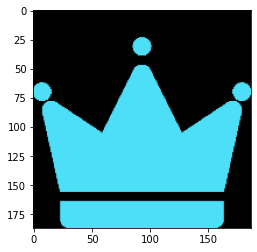

In [16]:
sticker_path = "./camera_sticker/images/king.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

In [17]:
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,-53)


In [18]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(134, 187, 3)


In [19]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,0)


In [20]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

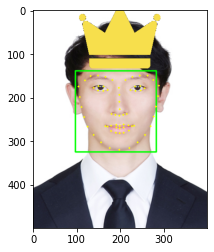

In [21]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

원본이미지로 왕관씌우기

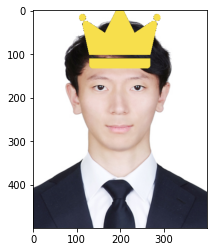

In [22]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

고양이 수염달기

얼굴 위치 확인 및 점 찍기

In [95]:
img_rgb_cop = img_rgb.copy()

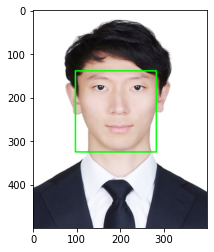

In [96]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_rgb_cop,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
plt.imshow(img_rgb_cop)
plt.show()

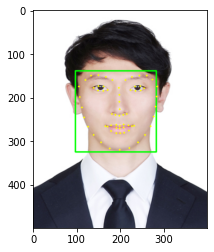

In [97]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb_cop,dlib_rect)
    list_points = list(map(lambda p: (p.x,p.y),points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rgb_cop, point, 2, (255,255,0), -1)
plt.imshow(img_rgb_cop)
plt.show()

In [98]:
refine_x_l = (2*landmark[2][0]+landmark[32][0])//3
refine_y_l = (landmark[2][1]+landmark[32][1])//2
refine_x_r = (2*landmark[14][0]+landmark[34][0])//3
refine_y_r = (landmark[50][1]+landmark[52][1])//2

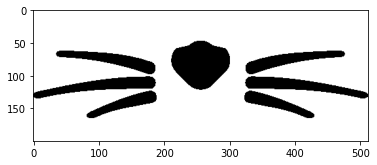

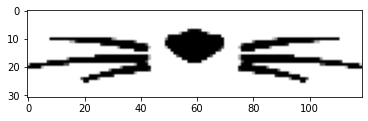

231 262
(31, 119, 3)


In [99]:
w=refine_x_r-refine_x_l
h=refine_y_r-refine_y_l
sticker_path = "./camera_sticker/images/cat.png"
img_sticker = cv2.imread(sticker_path)
img_sticker = img_sticker[150:350]
plt.imshow(img_sticker)
plt.show()


img_sticker = cv2.resize(img_sticker, (w,h))


plt.imshow(img_sticker)
plt.show()

print((landmark[2][1]+landmark[32][1])//2,(landmark[50][1]+landmark[52][1])//2)
print (img_sticker.shape)


위치 변경 -> 코로 29,33이용



In [100]:
height = (2*landmark[28][1]+landmark[33][1])//3

In [101]:
sticker_area = img_rgb_cop[height:height+h, refine_x_l:refine_x_r]
img_rgb_cop[height:height+h, refine_x_l:refine_x_r] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

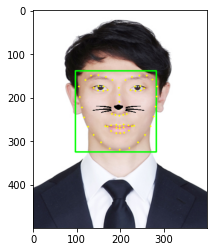

In [102]:
plt.imshow(img_rgb_cop)
plt.show()

In [105]:
img_rgb_cop = img_rgb.copy()
sticker_area = img_rgb_cop[height:height+h, refine_x_l:refine_x_r]
img_rgb_cop[height:height+h, refine_x_l:refine_x_r] = \
    np.where(img_sticker==(255,255,255),sticker_area,img_sticker).astype(np.uint8)

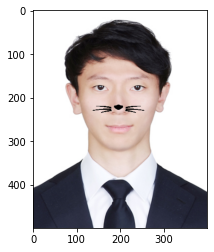

In [106]:
plt.imshow(img_rgb_cop)
plt.show()

고양이 수염 달기 함수화

In [116]:
def cat_whiskers(img_path,sticker_path):
  #이미지 불러오기
  my_image_path = img_path
  img_bgr = cv2.imread(my_image_path)
  img_bgr = cv2.resize(img_bgr,(400,500))
  img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
  #랜드마크 및 고양이 수염 위치 찾기
  img_rgb_cop = img_rgb.copy()

  detector_hog = dlib.get_frontal_face_detector()
  dlib_rects = detector_hog(img_rgb_cop, 1)
  #얼굴이 한 개라 가정 
  #박스씌우기
  for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rgb_cop,(l,t),(r,b),(0,255,0),2,lineType=cv2.LINE_AA)
  #랜드마크 찍기
  list_landmarks = []
  for dlib_rect in dlib_rects:
      points = landmark_predictor(img_rgb_cop,dlib_rect)
      list_points = list(map(lambda p: (p.x,p.y),points.parts()))
      list_landmarks.append(list_points)
      
  for landmark in list_landmarks:
      for point in landmark:
          cv2.circle(img_rgb_cop, point, 2, (255,255,0), -1)
  #고양이 수염 크기 조절을 위한 수치
  refine_x_l = (2*landmark[2][0]+landmark[32][0])//3
  refine_y_l = (landmark[2][1]+landmark[32][1])//2
  refine_x_r = (2*landmark[14][0]+landmark[34][0])//3
  refine_y_r = (landmark[50][1]+landmark[52][1])//2
  
  w=refine_x_r-refine_x_l
  h=refine_y_r-refine_y_l

  img_sticker = cv2.imread(sticker_path)

  ## 고양이 수염부분 용 크랩 및 리사이즈
  img_sticker = img_sticker[150:350]
  img_sticker = cv2.resize(img_sticker, (w,h))

  #수염 붙이기
  sticker_area = img_rgb[height:height+h, refine_x_l:refine_x_r]
  img_rgb[height:height+h, refine_x_l:refine_x_r] = \
  np.where(img_sticker==(255,255,255),sticker_area,img_sticker).astype(np.uint8)

  return img_rgb


In [113]:
sticker_path = "./camera_sticker/images/cat.png"
img_path = "./camera_sticker/images/image.jpg"

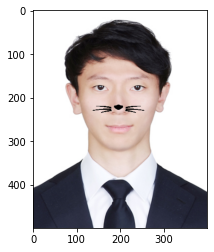

In [117]:
plt.imshow(cat_whiskers(img_path,sticker_path))
plt.show()

1. 얼굴각도  
  코 축 및 눈 축을 이용해 얼굴 회전 각도 계산 및 고양이 수염 회전  
  코 중심과 얼굴 좌측 우측과의 거리를 이용해 수염 의 비율 조절.
  위에서는 x좌표를 얼굴 좌우를 이용해 같이 계산했지만 30과 33을 이용해 계산하는 것이 더 나음.

2. 거리  
  얼굴 인식이 되지 않는 경우에는 (거리가 멀다거나 등) 진행을 할 수 없음.


3. 얼굴 개수
  위의 함수는 얼굴이 1개인 것을 가정하여 진행하였으며, 2개 이상을 고려 할 경우 수염을 조절하고 다는 부분에 for 를 적용하여 rect 마다 다르게 하여야함.